# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [4]:
df.shape[0]

1000

# 3. Plot Histogram for column 'CreditAmount'

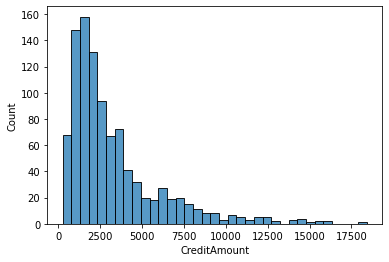

In [6]:
sns.histplot(x='CreditAmount',data=df)
plt.show()

# 3b. Create creditability dataframe

In [7]:
cred0=df.loc[df.Creditability==0]
cred1=df.loc[df.Creditability==1]

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [9]:
pd.concat([cred0,cred1],axis=0).Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

# 6. Prepare input data for the model

In [11]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='Creditability')
y=df.Creditability
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

# 7. Fit logistic regression model

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
pred=model.predict(x_test)

# 8. Test accuracy calculation

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.715

# 9. Build a confusion matrix

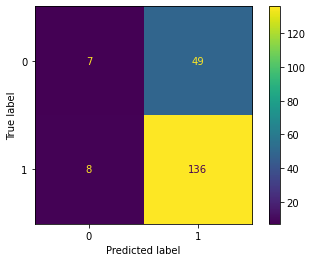

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [16]:
pred_proba=model.predict_proba(x_test)

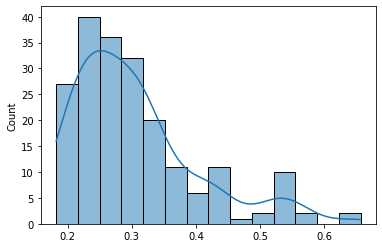

In [18]:
pred_proba_0=[]
for i in pred_proba:
    pred_proba_0.append(i[0])
sns.histplot(pred_proba_0,kde=True)
plt.show()

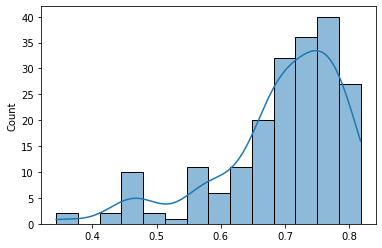

In [19]:
pred_proba_1=[]
for i in pred_proba:
    pred_proba_1.append(i[1])
sns.histplot(pred_proba_1,kde=True)
plt.show()